here loaded directed graph:

In [1]:
import pandas as pd
data = pd.read_csv('/content/fb-pages-food.edges', sep=',') #here is the data

In [2]:
data.columns=['u','v'] #columns name is u for source and v for target 

In [3]:
data #here is the final data

,u,v
0,0,58
1,0,132
2,0,603
3,0,398
4,0,555
...,...,...
2096,597,611
2097,601,603
2098,601,616
2099,603,616


In [4]:
n=[]  #here count for the total nodes in the graph
for i in range(len(data)):
  n.append(data['u'][i])
  n.append(data['v'][i])
n=list(set(n))

In [5]:
print("total nodes in the graph is :",len(n))

total nodes in the graph is : 620


In [6]:
print("Total number edges present in the graph is: ",len(data))

Total number edges present in the graph is:  2101


In [7]:
overall_100_graphs_degree_distribution={} #it is grphwise degree for all 1o0 graphs and vales are the unique degree counts of each node of the random 100 graphs
for i in range(1,101):
  overall_100_graphs_degree_distribution[i]={}


In [8]:
unique_degrees={} #here it is dictionary for the unqiue degree

In [9]:
p=((len(data))*2)/((len(n))*((len(n))-1))
print("probability value is : p : number of edges in the graph / total number of possible edges in the graph: ",p)

probability value is : p : number of edges in the graph / total number of possible edges in the graph:  0.010948981187138464


Gilberts ranbom graph generation algorithm:

Comparision with 100 random graphs:
As here probability value p is very small and the random value x generated that will be compare to generate the edges. So if that x is small the p then there is edges connect between the two nodes else no nodes. Therefore. 

(1) Here 100 random graphs generated will have very few edges compare to original graph genreally Hence random genrtaed graph will me more sparse compare to original graph.

(2)Here also random generated graphs will have less degree compare to oerignial graph as less number of edges.


In [10]:
import random   
for count in range(1,100+1):   #loop for all the 100 graphs:
  ##intitialise:graph
  # adjancency_matrix= [[0 for i in range(len(n))] for j in range(len(n))]
  # edge list intialise
  edge_list={}    #edge list for each new individual  random  graph generate
  for i in range(len(n)):   #initialization of edge list
    edge_list[i]=[]
  for c in range(len(n)):  #here we make 2 loops for creating edges if possible between 2 node
    for r in range(c+1,len(n)):
        x=random.uniform(0,1)  #random unform probabilty is generated and check with p if p>x then edge is possbile else not
        if p>x:
          # adjancency_matrix[r][c]=1
          # adjancency_matrix[c][r]=1
          edge_list[r].append(c)   #make undirected graph
          edge_list[c].append(r)  

  degree_of_nodes={}    #now here we find out all possible degree of nodes [present in generated graph]
  for i in edge_list.keys():
    degree_of_nodes[i]=0
  for i in edge_list.keys():    #degeree is total adjancent nodes present around partricular nodes
    degree_of_nodes[i]=len(edge_list[i])



  degree_frequncy={}   #frequncy count of the occurence of the degree of the nodes
  for key,value in degree_of_nodes.items():
    if value not in degree_frequncy.keys():
      degree_frequncy[value]=0
      degree_frequncy[value]+=1
    else:
      degree_frequncy[value]+=1
  for i in degree_frequncy.keys():
    if i not in unique_degrees.keys():
      unique_degrees[i]=0
  

  overall_100_graphs_degree_distribution[count]=degree_frequncy   #store frquncy count of each degree graphwise and assign it here

        

In [ ]:
overall_100_graphs_degree_distribution #degree frquncy distribution for each grph where key is graph number and value is degrees

In [12]:

for graph,deg in overall_100_graphs_degree_distribution.items():   #here counting frquncy of all the unique degrees in overall random gernerated graph
  # graph 1
  for key,value in deg.items():
    unique_degrees[key]+=value

In [13]:
kmax=0
cmax=0
for key,value in unique_degrees.items(): #for finding maximum degree kmax in the graph
  if cmax< value:
    kmax=key
    cmax=value

In [14]:
for i in unique_degrees.keys():  #take out mean of the degrees
  unique_degrees[i]/=100

MEAN vs DEGREE of the graph is:

Here mean of taken degree x where like what is the frequncy of degree x in all the 100 random graph and sum up them and divide by 100 i.e taking mean.

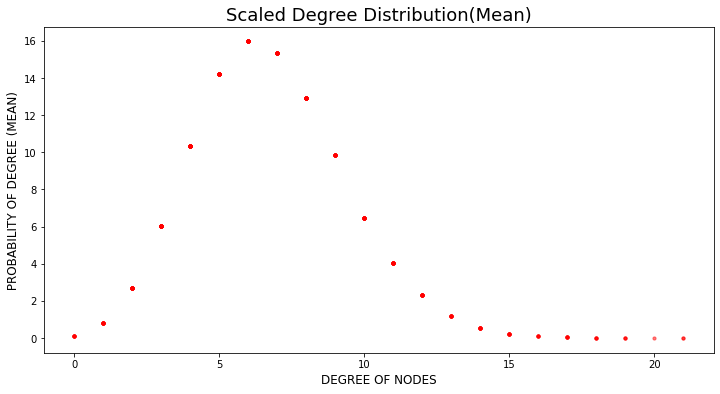

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=[]
y_axis=[]
for key,value in  unique_degrees.items():  
  x_axis.append(key)
  y_axis.append(value/kmax)
  ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
     
plt.xlabel("DEGREE OF NODES", fontsize=12) 
plt.ylabel(" PROBABILITY OF DEGREE (MEAN) ", fontsize=12) 
plt.title("Scaled Degree Distribution(Mean)",fontsize=18) 
plt.show() 

standard deviation:

In [16]:
import numpy as np  
standard_deviation_overall={} #here we are finding out standard deviation for all the degree of the graph using
standard_deviation_N={}  #using formula sqrt((x-mean(x))/N(total number))
for i in unique_degrees.keys():
  standard_deviation_overall[i]=0
  standard_deviation_N[i]=0
for graph,deg in overall_100_graphs_degree_distribution.items(): #lloop for overall degrees of 100 graphs
  for key,value in deg.items():
    standard_deviation_overall[key]+=np.square(value - unique_degrees[key])  #square(x-mean of x) calculation here
    standard_deviation_N[key]+=1 

In [17]:
for i in unique_degrees.keys():
  standard_deviation_overall[i]=np.sqrt(standard_deviation_overall[i]/standard_deviation_N[i]) # sqrt(sqare(x-mean of x)/N) calculation

Standard deviation vs degree graph

In [20]:
kmax=0
cmax=0
for key,value in standard_deviation_overall.items(): #for finding maximum degree kmax in the graph
  if cmax< value:
    kmax=key
    cmax=value
kmax=max(list(standard_deviation_overall.values()))

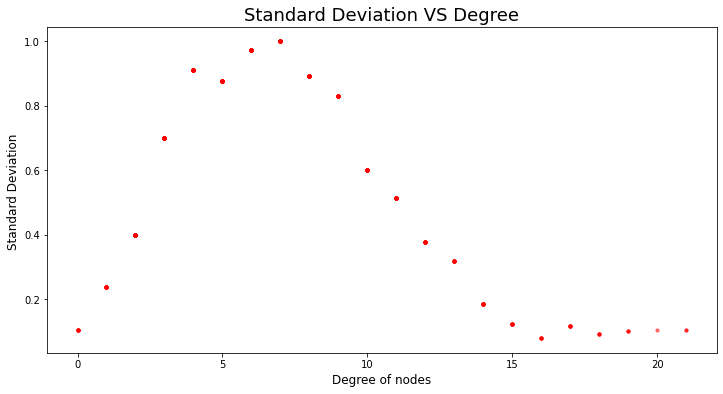

In [21]:
import matplotlib.pyplot as plt
import numpy as np
fg, ax = plt.subplots(figsize =(12, 6)) 
x_axis=[]
y_axis=[]
for key,value in  standard_deviation_overall.items():  
  x_axis.append(key)
  y_axis.append(value/kmax)
  ax.scatter(x_axis,y_axis,s=np.pi*3.2,c=("red"), alpha=0.5)
     
plt.xlabel("Degree of nodes", fontsize=12) 
plt.ylabel("Standard Deviation ", fontsize=12) 
plt.title("Standard Deviation VS Degree",fontsize=18) 
plt.show() 